![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Introduction to Keras using a TensorFlow 2.0 Backend**
### **Training a Simple CNN on the MNIST Dataset - Handwrittent Digits**

---



---



In this lesson, we use **Keras with a TensorFlow 2.0** Backend to to create a **simple Convolutional Neural Network model** in PyTorch and train it to **recognize handwritten digits in the MNIST dataset.**
1. Loading our MNIST dataset
2. Inspecting our dataset 
3. Visualizing our image dataset
5. Preprocessing our dataset
6. Building our Model
7. Training our Model
8. Plotting our training logs
9. Saving and Loading our Model
10. Testing our model on test data

In [31]:
# We can load the built in datasets from this function
from tensorflow.keras.datasets import mnist

# loads the MNIST training and test dataset 
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [32]:
#A Quick check to see if we are using the GPU

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2366332415410535308
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9606186870369067262
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# 2.Inspecting our data

In [33]:
#Display the number of samples in x_train,x_test, y_train,y_test
print('Initial; shape of out x_train',(x_train.shape))

#Print the number of samples in out data set

print('Number of sample in out training data: ' + str(len(x_train)))
print('Number of labels in our training dta ' + str(len(y_train)))
print('Number of sample in out test data: ' + str(len(x_test)))
print('Number of labels in out test data: ' + str(len(y_test)))

# print the image dimension and no. of labels in our training and test data

print("\n")
print('Dimension of x_train' + str(x_train[0].shape))
print('Labels in y_train:' + str((y_train.shape)))
print('\n')
print('Dimension in x_test' + str(x_test[0].shape))
print('Labels in y_test:' +str(y_test.shape))


Initial; shape of out x_train (60000, 28, 28)
Number of sample in out training data: 60000
Number of labels in our training dta 60000
Number of sample in out test data: 10000
Number of labels in out test data: 10000


Dimension of x_train(28, 28)
Labels in y_train:(60000,)


Dimension in x_test(28, 28)
Labels in y_test:(10000,)


In [34]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 3. Visualizing our dataset

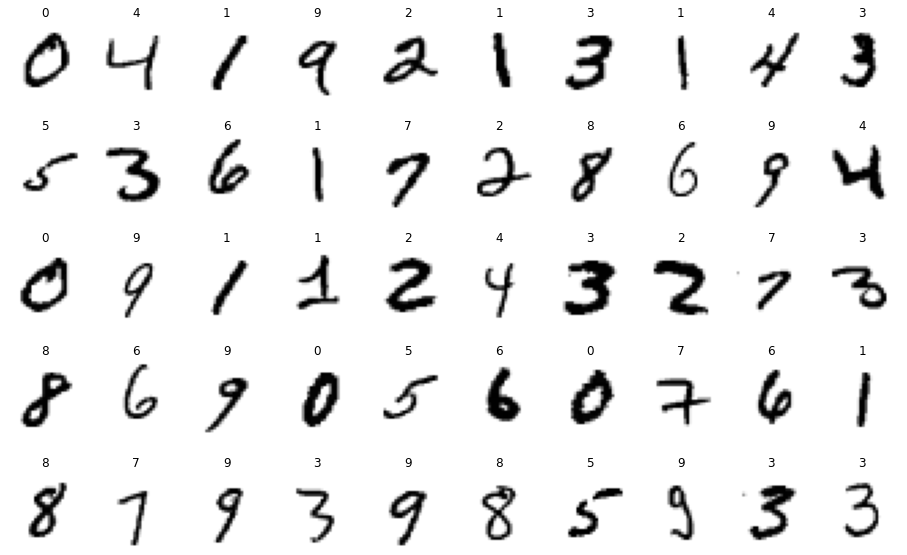

In [35]:
#lets view the first 50  images of our MNIST training Dataset

import matplotlib.pyplot as plt

# creat figure and change size
plt.figure(figsize=(16,10))

# Set how many images we wish to see
num_of_images = 50

# iterate index from 1-51

for index in range(1,num_of_images +1):
  plt.subplot(5,10,index).set_title(f'{y_train[index]}')
  plt.axis('off')
  plt.imshow(x_train[index],cmap='gray_r')

# **4.Preprocessing our dataset**

In [36]:
#let us store the number of rows and columns 

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

#getting out data in the right shape  needed for keras 
#we need to add 4th dimension to our data thereby chaning our orginal image shape of (60000,28,28) to (60000,28,28,1)

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#store the shape of a single image
input_shape = (img_rows,img_cols,1)

#chnage our image type to float 32 data type 
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# normalice our datra by changing the range from (0-255) to (0-1)

x_train/=255.0
x_test/=255.0

print('x_train.shape:',x_train.shape)
print(x_train.shape[0], 'Train samples')
print(x_test.shape[0],'Test sample')
                        

x_train.shape: (60000, 28, 28, 1)
60000 Train samples
10000 Test sample


# **One Hot Encode Our labels(Y)**

In [37]:
#we can easily implement this transformm using to_categorical from tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# now we one hot encode outpluts
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

#let's count the numbre columns in our hot encoded matrix

print('Number of calsses:' + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = y_train.shape[1] * x_train.shape[2]

print("num_classes",num_classes)
print('num_pixels:',num_pixels)
print('y_test.shape',y_test.shape)
print('y_train.shape',y_train.shape)
print('x_train.shape',x_train.shape)

Number of calsses:10
num_classes 10
num_pixels: 280
y_test.shape (10000, 10)
y_train.shape (60000, 10)
x_train.shape (60000, 28, 28, 1)


In [38]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Building Our Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import SGD

#Create model 

model = Sequential()

#our first Convolution Layer, Filer size 32 which Reduces our Layer size to 26*26*32
#we use ReLu activation and Specify our input_shape which is 238*28*1

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape=input_shape))

#our Second Convolution Layer ,Filter size 64 which is reduces our layers size to 24*24*64
model.add(Conv2D(64,(3,3,),activation='relu'))

#we use MAxPooling With kernelsize of 2*2, this reduces to 12*12*64
model.add(MaxPooling2D(pool_size=(2,2)))

# we then Flatten our tensor object before input into our Dense Layer a Flatten Operation on a tensor reshapes the tensor to have the shape that is equal to the number of elements Contained in tensor in our CNN it Goes from 12*12*64 to 9216*1
model.add(Flatten())
# we connect this layer to Fully Conected /Dense Layer of size 1*128
model.add(Dense(128,activation='relu'))
# we create our final Fully Connected/Dense Layer with an Output for each class(10)
model.add(Dense(10,activation='softmax'))

#we compile our model, this creates an object that store the model we just created 
#we set our optimizer to use Stochastic Gradient Descent (Learning Rate of 0.001)
# we set out loss function to be categorical_crossentropy as it's suitable for multiclass problems
# final the metric ( what we judge our performance on to be accuracy)

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.001),
              metrics=['accuracy'])

# we can use the summary function to display our model layers and paraneters
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               1179776   
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                      

# 6.Training Our Model

Our preprocessed data ius used as the input


- we set the batch size to 128( or any number ranging from 8-256) is good
-  we set the number of epochs to 30
- we store our model training results for ploting in future
- we then use keras model.evaluate funtion to output the model final performance, Here we are examing the test loss and accuracy



In [40]:
from dummy_threading import ExceptHookArgs
batch_size = 150
epochs= 30

#store our result here so we can plot later
#In our fir function we specify our dataset(x_train & y_train),the batch size(typically 16 to 128 depending on your RAM),the number of epochs (usually 10-100) and our validation dataset(x_tets and y_tets)
#Verbose = 1, set our training to output performance metrics every Epoch

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test,y_test))

# we obtain our accuracy score using the evaluted function
#score holds two calues,opur test loss and accuracy
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Epoch 1/30
400/400 [==============================] - 4s 10ms/step - loss: 2.2551 - accuracy: 0.3550 - val_loss: 2.1911 - val_accuracy: 0.5335
Epoch 2/30
400/400 [==============================] - 4s 9ms/step - loss: 2.0408 - accuracy: 0.6424 - val_loss: 1.7623 - val_accuracy: 0.7344
Epoch 3/30
400/400 [==============================] - 4s 9ms/step - loss: 1.2594 - accuracy: 0.7704 - val_loss: 0.7810 - val_accuracy: 0.8329
Epoch 4/30
400/400 [==============================] - 4s 9ms/step - loss: 0.6283 - accuracy: 0.8431 - val_loss: 0.4882 - val_accuracy: 0.8710
Epoch 5/30
400/400 [==============================] - 4s 9ms/step - loss: 0.4631 - accuracy: 0.8724 - val_loss: 0.4022 - val_accuracy: 0.8877
Epoch 6/30
400/400 [==============================] - 4s 9ms/step - loss: 0.4011 - accuracy: 0.8872 - val_loss: 0.3604 - val_accuracy: 0.8978
Epoch 7/30
400/400 [==============================] - 4s 9ms/step - loss: 0.3675 - accuracy: 0.8947 - val_loss: 0.3350 - val_accuracy: 0.9041
Epoch

# **7.Plotting our Loss and Accuracy Charts **


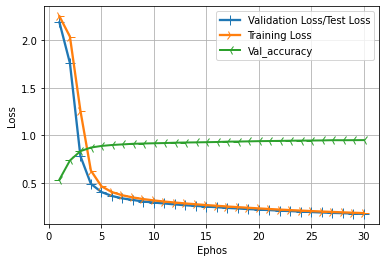

In [49]:
import matplotlib.pyplot as plt

history_dict=history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)

# plot line charts for both validation and Training Loss

line1 = plt.plot(epochs,val_loss_values,label='Validation Loss/Test Loss')
line2 = plt.plot(epochs,loss_values,label='Training Loss')
line3 = plt.plot(epochs,val_accuracy,label='Val_accuracy')
plt.setp(line1,linewidth=2.3,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.3,marker='4',markersize=10.0)
plt.setp(line3,linewidth=2.0,marker='3',markersize=10.0)

plt.xlabel('Ephos')
plt.ylabel('Loss')

plt.grid(True)
plt.legend()
plt.show()

In [51]:
model.save('mnist_simple_cnn_30_epoch.h5')
print('Model Saved')

Model Saved


In [52]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_30_epoch.h5')

In [54]:
import numpy as np

# **Getting Predictions from our sample Test Data**

In [57]:
 print(x_test.shape)

 pred=np.argmax(classifier.predict(x_test),axis =1)
 print('Com[leted\n')
 print(pred)
 print(type(pred))
 print(len(pred))

(10000, 28, 28, 1)
313/313 [==============================] - 1s 2ms/step
Com[leted

[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000
